In [1]:
import pandas as pd

df = pd.read_csv('./cinemaTicket_Ref.csv')

In [2]:
print(df.head())
print(df.info())
print(df.describe())

   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3       

In [3]:
df.isnull().sum()   # check for missing values

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [4]:
df["occu_perc"]=df["occu_perc"].fillna(df["occu_perc"].mean())  # fill missing values with mean
df["capacity"]=df["capacity"].fillna(df["capacity"].mean())  # fill missing values with mean

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df["date"]

0        2018-05-05
1        2018-05-05
2        2018-05-05
3        2018-05-05
4        2018-05-05
            ...    
142519   2018-11-04
142520   2018-11-04
142521   2018-11-04
142522   2018-11-04
142523   2018-11-04
Name: date, Length: 142524, dtype: datetime64[ns]

In [10]:
df['revenue_per_ticket'] = df['total_sales'] / df['tickets_sold']

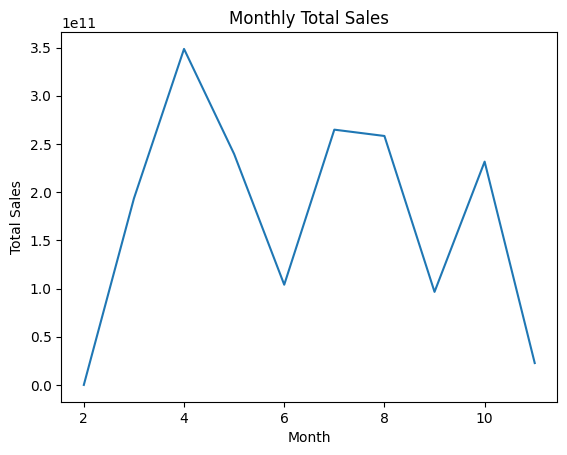

In [11]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('month')['total_sales'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['location_column', 'sales_column']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)  # Adjust clusters based on the analysis
df['cinema_code'] = kmeans.fit_predict(scaled_features)

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['total_sales', 'occu_perc', 'ticket_price']].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
df['cinema_cluster'] = kmeans.fit_predict(scaled_features)

In [13]:
popular_movies = df.groupby('film_code')['tickets_sold'].sum().sort_values(ascending=False)
print(popular_movies.head())

film_code
1554    4129543
1484    1789357
1493    1719867
1482    1628821
1483    1623569
Name: tickets_sold, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['ticket_price', 'occu_perc', 'capacity']].fillna(0)
y = df['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1711021.7365985273
